# New Version of Comment Labeling Using Keywords

In [2]:
import pandas as pd
import os
import numpy as np

In [3]:
path = "C:/Users/doosti/Dropbox (Chapman)/Research/Research Projects/Fitness/Data/"
file = "comments_keywords_labels_010324.csv"

In [27]:
comments_labeled = pd.read_csv(os.path.join(path, file))
comments = pd.read_csv(os.path.join(path, "merged_comments.csv"))
videos = pd.read_csv(os.path.join(path, "videos_101223.csv"))
videos_trends = pd.read_csv(os.path.join(path, "final_yoga_videos_tends_101023.csv"))
trends = pd.read_csv(os.path.join(path, "final_yoga_channels_trends_091523.csv"))

In [28]:
# merging comments and labels
main_cols = ['Appearance', 'Enjoyment', 'Fitness', 'Competence', 'Social']

comments.index = np.arange(len(comments))
comments_labeled = comments_labeled[:-2999].copy() # removing the extra labeled comments
comments_labeled.index = comments_labeled['doc_id']

comments.loc[comments_labeled.index, 'Appearance'] = comments_labeled['Appearance']
comments.loc[comments_labeled.index, 'Enjoyment'] = comments_labeled['Enjoyment']
comments.loc[comments_labeled.index, 'Fitness'] = comments_labeled['Fitness']
comments.loc[comments_labeled.index, 'Competence'] = comments_labeled['Competence']
comments.loc[comments_labeled.index, 'Social'] = comments_labeled['Social']

# an alternative way to merge the comments and labels
# comments['doc_id'] = np.arange(len(comments))
# comments['Appearance'] = 0.0
# comments['Enjoyment'] = 0.0
# comments['Fitness'] = 0.0
# comments['Competence'] = 0.0
# comments['Social'] = 0.0
# comments.loc[:, main_cols] = comments[['doc_id']].merge(comments_labeled[['doc_id']+main_cols], on='doc_id', how='left').loc[:,main_cols].values
# comments.drop(['doc_id'], axis=1, inplace=True)

comments['max_score'] = comments.loc[:, main_cols].max(axis=1)
comments['label'] = comments.loc[:, main_cols].idxmax(axis=1)
comments.loc[comments['max_score'] < 0.3, 'label'] = 'other'
print(comments['label'].value_counts())

label
other         815978
Enjoyment       6524
Fitness         4044
Competence       591
Appearance       208
Social           135
Name: count, dtype: int64


C:\Users\doosti\AppData\Local\Temp\ipykernel_121260\482475724.py:25: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  comments['label'] = comments.loc[:, main_cols].idxmax(axis=1)


In [35]:
print(videos.columns)

Index(['video_id', 'title', 'creator', 'creator_id', 'publish_date',
       'duration', 'v1', 'v2', 'v3', 'v7', 'v30', 'e1', 'e2', 'e3', 'e7',
       'e30', 'views', 'enagement', 'likes', 'shares', 'comments', 'keywords',
       'topics', 'challenge'],
      dtype='object')


In [36]:
print(videos_trends.head())

      video_id        date   views  engagements
0  CpoaI_rVRXU  2023-09-06  2023.0        100.0
1  CpoaI_rVRXU  2023-09-07   918.0          5.0
2  CpoaI_rVRXU  2023-09-08    45.0          1.0
3  CpoaI_rVRXU  2023-09-09    33.0          0.0
4  CpoaI_rVRXU  2023-09-10    36.0          0.0


In [32]:
# threshold = 11
comments = comments[comments.video_id.str.len() == 11].copy()
print(comments.shape)
# drop rows with missing year, month, or day
comments_labeled = comments.dropna(subset=['comment_year', 'comment_month', 'comment_day']).copy()
print(comments_labeled.shape)
print(comments_labeled.isnull().sum())

(827566, 15)
(827552, 15)
video_id           0
user_id            0
comment_text     100
no_likes           0
no_replies         0
comment_year       0
comment_month      0
comment_day        0
Appearance       100
Enjoyment        100
Fitness          100
Competence       100
Social           100
max_score        100
label            100
dtype: int64


In [33]:
# Create a function to format and convert the date
def to_datetime_with_padding(year, month, day):
    # Pad month and day with zeros if necessary
    month = f"{month:02d}"
    day = f"{day:02d}"
    # Combine and convert to datetime
    date_str = f"{year}-{month}-{day}"
    return pd.to_datetime(date_str)

comments_labeled['comment_year'] = comments_labeled.comment_year.astype(int)
comments_labeled['comment_month'] = comments_labeled.comment_month.astype(int)
comments_labeled['comment_day'] = comments_labeled.comment_day.astype(int)

# Apply the function to each row
comments_labeled['date'] = comments_labeled.apply(lambda row: to_datetime_with_padding(row["comment_year"], row["comment_month"], row["comment_day"]), axis=1)

In [34]:
comments_labeled.fillna(0).to_csv(os.path.join(path, "labeled_comments_scores_030124.csv"), index=False)

In [35]:
# merging with video dataset
#comments_labeled = 
comments_labeled['creator_id'] = comments_labeled.merge(videos,how='left',on='video_id').creator_id.values
comments_labeled = comments_labeled.dropna(subset=['creator_id'])
print(comments_labeled.isnull().sum())

video_id           0
user_id            0
comment_text     100
no_likes           0
no_replies         0
comment_year       0
comment_month      0
comment_day        0
Appearance       100
Enjoyment        100
Fitness          100
Competence       100
Social           100
max_score        100
label            100
date               0
creator_id         0
dtype: int64


In [37]:
channel_day = comments_labeled.fillna(0).groupby(['creator_id','date']).label.value_counts().unstack().reset_index()
channel_day = channel_day.fillna(0)
channel_day = channel_day.rename(columns={0:'none'})
print(channel_day.shape)
print(channel_day.creator_id.nunique())
print(channel_day.head())


(48673, 9)
71
label           creator_id       date  none  Appearance  Competence  \
0      262h9yTG1f03Nobo501 2020-11-05   0.0         0.0         0.0   
1      262h9yTG1f03Nobo501 2020-11-11   0.0         0.0         0.0   
2      262h9yTG1f03Nobo501 2020-11-12   0.0         0.0         0.0   
3      262h9yTG1f03Nobo501 2020-11-13   0.0         0.0         0.0   
4      262h9yTG1f03Nobo501 2020-11-14   0.0         0.0         0.0   

label  Enjoyment  Fitness  Social  other  
0            0.0      0.0     0.0    1.0  
1            0.0      0.0     0.0   28.0  
2            0.0      0.0     0.0   46.0  
3            1.0      0.0     0.0   41.0  
4            1.0      1.0     0.0   44.0  


In [38]:
channel_day.to_csv(os.path.join(path, "channel_day_010324.csv"), index=False)

In [39]:
# Channel day with scores
cols = ['Competence','Appearance','Fitness','Enjoyment','Social']
channel_day_scores = comments_labeled.fillna(0).groupby(['creator_id','date'])[cols].sum().reset_index()
channel_day_scores.head()
channel_day_scores['no_comments'] = comments_labeled.groupby(['creator_id','date']).comment_text.count().values
channel_day_scores['no_users'] = comments_labeled.groupby(['creator_id','date']).user_id.nunique().values

print(channel_day_scores.shape)
print(channel_day_scores.head())
print(channel_day_scores.isnull().sum())

channel_day_scores.to_csv(os.path.join(path, "channel_day_scores_010324.csv"), index=False)

(48673, 9)
            creator_id       date  Competence  Appearance   Fitness  \
0  262h9yTG1f03Nobo501 2020-11-05    0.000000    0.000000  0.000000   
1  262h9yTG1f03Nobo501 2020-11-11    0.470194    0.192258  0.846807   
2  262h9yTG1f03Nobo501 2020-11-12    0.437437    0.000000  0.000000   
3  262h9yTG1f03Nobo501 2020-11-13    0.000000    0.354054  0.000000   
4  262h9yTG1f03Nobo501 2020-11-14    0.203973    0.352136  0.820903   

   Enjoyment    Social  no_comments  no_users  
0   0.000000  0.000000            1         1  
1   0.000000  0.313390           28        28  
2   0.000000  0.324201           46        41  
3   0.304512  0.152543           42        36  
4   0.322645  0.000000           46        36  
creator_id     0
date           0
Competence     0
Appearance     0
Fitness        0
Enjoyment      0
Social         0
no_comments    0
no_users       0
dtype: int64


In [96]:
channel_day = pd.read_csv(os.path.join(path, "channel_day.csv"))
merged = trends.merge(channel_day,how='left',on=['creator_id','date']) #.to_csv(os.path.join(path, "trends_channel_day.csv"), index=False)
merged.isnull().sum()
print(f"number of creators with comments: {merged[merged.appearance.notnull()].creator_id.nunique()}, out of {merged.creator_id.nunique()} creators in trends")
# there seems to be a problem with the data set, the number of creators with comments is less than the number of creators in trends

number of creators with comments: 71, out of 75 creators in trends


## Individual Level Data

In [52]:
comments_labeled.groupby(['user_id','date']).comment_text.count().reset_index().to_csv(os.path.join(path, "user_day.csv"), index=False)

## Summary Statistics

In [105]:
comments_labeled['challenge'] = comments_labeled.merge(videos,how='left',on='video_id').challenge.values
comments_labeled.challenge.value_counts()

challenge
False    602105
True     207216
Name: count, dtype: int64

In [119]:
# ratio of comments for challenge and non-challenge videos
summary = comments_labeled.groupby(['challenge']).label.value_counts().unstack().reset_index()
summary.iloc[:,1:] = summary.iloc[:,1:] / comments_labeled.challenge.value_counts().values.reshape(-1,1)
summary

label,challenge,appearance,competence,fitness,interest,social
0,False,0.003235,0.167793,0.044100,0.021619,0.002129
1,True,0.001650,0.280114,0.040991,0.032107,0.002611


## Time Trend of Topics

['2021-04' '2021-05' '2021-06' '2021-07' '2021-08' '2021-09' '2021-10'
 '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04' '2022-05'
 '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11' '2022-12'
 '2023-01' '2023-03' '2023-04' '2023-07' '2023-08' '2023-09' '2023-02'
 '2023-06' '2023-05' '2021-03' '2021-02' '2021-01' '2020-12' '2020-11'
 '2020-10' '2023-10' '2020-04' '2020-08']


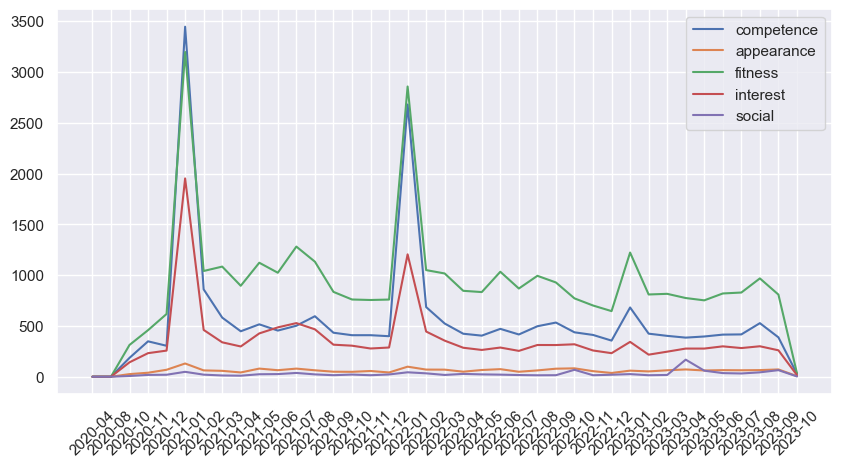

In [123]:
# create a distribution of topics over time and plot it using the comments_labeled dataset
comments_labeled['year_month'] = comments_labeled.date.dt.strftime('%Y-%m')
# aggregated number of competenc, appearance, fitness, interest, and social over time
cols = ['competence','appearance','fitness','interest','social']
summary = comments_labeled.groupby(['year_month'])[cols].sum().reset_index()
# visualize the distribution of topics over time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,5))
plt.plot(summary.year_month, summary.competence, label='competence')
plt.plot(summary.year_month, summary.appearance, label='appearance')
plt.plot(summary.year_month, summary.fitness, label='fitness')
plt.plot(summary.year_month, summary.interest, label='interest')
plt.plot(summary.year_month, summary.social, label='social')
plt.xticks(rotation=45)
plt.legend()
plt.show()


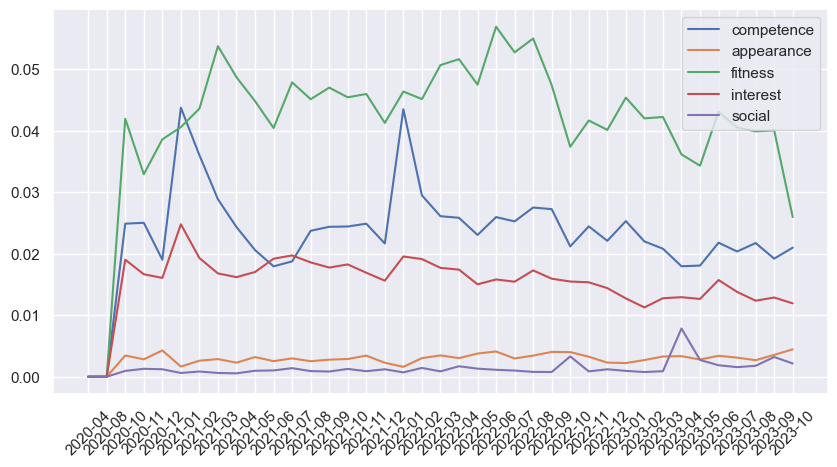

In [124]:
# normalize the data by the number of comments
summary = comments_labeled.groupby(['year_month'])[cols].sum().reset_index()
summary['no_comments'] = comments_labeled.groupby(['year_month']).comment_text.count().values
summary[cols] = summary[cols].div(summary.no_comments, axis=0)
plt.figure(figsize=(10,5))
plt.plot(summary.year_month, summary.competence, label='competence')
plt.plot(summary.year_month, summary.appearance, label='appearance')
plt.plot(summary.year_month, summary.fitness, label='fitness')
plt.plot(summary.year_month, summary.interest, label='interest')
plt.plot(summary.year_month, summary.social, label='social')
plt.xticks(rotation=45)
plt.legend()
plt.show()
